In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(a):
    # a is the output of sigmoid function 
    return a*(1-a)


def mse_loss(y,y_hat):
    return np.mean((y-y_hat)**2)

def mse_derivative(y,y_hat):
    #Derivative of MSE loss with respect to predictions 
    return 2*(y-y_hat)/y.size

In [4]:
np.random.seed(42)


class NNwithMinibatchGradientDescent:
    def __init__(self,input_size,hidden_size,output_size):
        # Initialize weights (W) and biases (b)
        self.W1=np.random.randn(input_size,hidden_size)
        self.b1=np.zeros((1,hidden_size))
        self.W2=np.random.randn(hidden_size,output_size)
        self.b2=np.zeros((1,output_size))

    
    def forward(self,x):
        self.z1=np.dot(x,self.W1)+self.b1
        self.A1=sigmoid(self.z1)
        self.z2=np.dot(self.A1,self.W2)+self.b2
        self.y_hat=self.z2
        return self.y_hat
    
    def backward(self,X,y,learning_rate):
        m=y.shape[0] # Total number of data points
        #comput the derivative  with respect to y_hat
        dl_dy_hat=mse_derivative(y,self.y_hat)
        #gradients of output layer 
        
        #Output layer gradients 
        dz2=dl_dy_hat*sigmoid_derivative(self.y_hat)
        dW2=np.dot(self.A1.T,dz2)/m #dz2 is derivative of dz(2) /dwij(2)
        db2=np.sum(dz2,axis=0,keepdims=True)/m #getting average over batch
        #Hidden layer gradients 
        dA1=np.dot(dz2,self.W2.T)
        dZ1=dA1*sigmoid_derivative(self.A1)
        dW1=np.dot(X.T,dZ1)/m
        db1=np.sum(dZ1,axis=0,keepdims=True)
        #update weights and biases 
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate,batch_size):
        n_samples = X.shape[0]
        history=[]
        for epoch in range(epochs):
            # Shuffle the data at each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # For mini batches 
            for start in range(0,n_samples,batch_size):
                end = min(start + batch_size, n_samples)
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
            # Forward pass
            self.forward(X_batch)
            # Backward pass and weight updates
            self.backward(X_batch, y_batch, learning_rate)
            if epoch % 100 == 0: # for each 100 epoch
                y_hat = self.forward(X)
                loss = mse_loss(y, y_hat)
                history.append(loss)
                print(f"Epoch {epoch}/{epochs} - Loss: {loss}")
        return history
    def predict(self,X):
        y_hat=self.forward(X)
        return y_hat

In [11]:
# Input predictions 
X = np.array([[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
y = np.array([[0],
                [1],
                [1],
                [0]])

# Initialize the neural network
model = NNwithMinibatchGradientDescent(input_size=2, hidden_size=4, output_size=1)
history=model.train(X, y, epochs=10000, learning_rate=0.001,batch_size=3)
# Test the network after training
predictions = model.predict(X)


Epoch 0/10000 - Loss: 1.3137277964108873
Epoch 100/10000 - Loss: 0.7865419281823602
Epoch 200/10000 - Loss: 0.6586994443110502
Epoch 300/10000 - Loss: 0.5957204269503673
Epoch 400/10000 - Loss: 0.5642513522759617
Epoch 500/10000 - Loss: 0.5408913975830901
Epoch 600/10000 - Loss: 0.527231725297601
Epoch 700/10000 - Loss: 0.5194533118117968
Epoch 800/10000 - Loss: 0.5112849821203631
Epoch 900/10000 - Loss: 0.5020256050740491
Epoch 1000/10000 - Loss: 0.4936374388619274
Epoch 1100/10000 - Loss: 0.49468677423567536
Epoch 1200/10000 - Loss: 0.5002705018008212
Epoch 1300/10000 - Loss: 0.49762859010263566
Epoch 1400/10000 - Loss: 0.49877608581399946
Epoch 1500/10000 - Loss: 0.4981838436398031
Epoch 1600/10000 - Loss: 0.49909558819426547
Epoch 1700/10000 - Loss: 0.4984762769630255
Epoch 1800/10000 - Loss: 0.4948364908599334
Epoch 1900/10000 - Loss: 0.49222988774170784
Epoch 2000/10000 - Loss: 0.49478112483764264
Epoch 2100/10000 - Loss: 0.49710098289545585
Epoch 2200/10000 - Loss: 0.49957687486

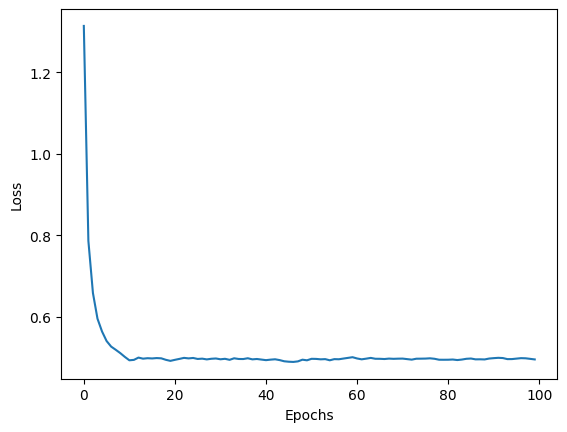

In [12]:
# Plotting the history
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()